In [ ]:
#| default_exp bbox_vis

## vis 
visuals let us know if everything is okay with data, the transforms performed were correct etc. In this section we will visualize the data is loaded in the last section.

Inspired and re-written from [`bbox-visualizer`](https://github.com/shoumikchow/bbox-visualizer/blob/master/bbox_visualizer/bbox_visualizer.py)

In [ ]:
#| export 
import cv2
import numpy as np 

In [ ]:
from pathlib import Path
from vision.data import load_data, image_grid, thumbnail

In [ ]:
root = Path("../data/VOCdevkit/VOC2012/")
ds = load_data("voc", root=root, train=True, transforms=None)
imgd = ds[np.random.randint(len(ds))]
imgd["img"].shape, imgd["bbox"], imgd["cat_ids"], imgd["cats"]

((333, 500, 3),
 array([[ 89,   1, 500, 285],
        [289, 183, 500, 331],
        [ 14, 110, 283, 332],
        [319, 279, 395, 332]]),
 array([2, 2, 2, 2]),
 ['bird', 'bird', 'bird', 'bird'])

## Draw bbox 

In [ ]:
img = imgd["img"].copy()
bbox = imgd["bbox"][0]
img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

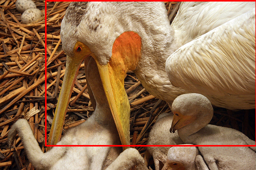

In [ ]:
thumbnail(img, 256)

## Opaque mask

In [ ]:

alpha = 0.5
overlay = img.copy()
overlay = cv2.rectangle(overlay, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), -1)
imgo = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

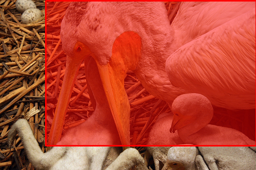

In [ ]:
thumbnail(imgo, 256)

In [ ]:
#| export 
def draw_bbox(img, bbox, bbox_color: tuple=(255, 0, 0), thickness: int=2, overlay: bool=False, alpha: float=0.5):
    #bbox is is xyxy format
    output = img.copy()
    thickness = -1 if overlay else thickness
    output = cv2.rectangle(output, (bbox[0], bbox[1]), (bbox[2], bbox[3]), bbox_color, thickness)
    if overlay: 
        overlay = img.copy()
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    return output

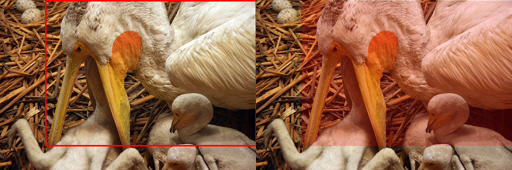

In [ ]:
img = imgd["img"]
bbox = imgd["bbox"][0]
img1 = draw_bbox(img, bbox)
img2 = draw_bbox(img, bbox, overlay=True, alpha=0.8)
image_grid([thumbnail(i, size=256) for i in [img1, img2]], rows=1, cols=2)

## Add Label 
- Add label `inside` or `top` of bbox 
- the label should have a background color (essentially like a sticker with background)

In [ ]:
label = imgd["cats"][0]
text_width = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][0]
text_width

61

In [ ]:
# we use -30 when we want to write on the top of bbox and +30 when we want to write inside the bbox 
label_bg = [bbox[0], bbox[1], bbox[0] + text_width, bbox[1] + 30]
label_bg

[89, 1, 150, 31]

In [ ]:
text_bg_color=(255, 255, 255)
text_color = (255, 0, 0)
img = imgd["img"].copy()
img = cv2.rectangle(img, (label_bg[0], label_bg[1]), (label_bg[2] + 5, label_bg[3]), text_bg_color, -1)
img = cv2.putText(img, label, (bbox[0] + 5, bbox[1] - 5 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)

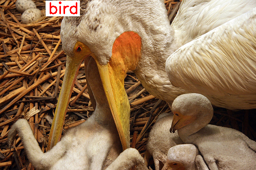

In [ ]:
thumbnail(img, 256)

In [ ]:
#| export 
def add_label(img, bbox, label, draw_bg=True, text_color=(255, 0, 0), text_bg_color=(255, 255, 255)):
    text_width = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][0]
    tip = +30 if bbox[1]-30<0 else -30 
    label_bg = [bbox[0], bbox[1], bbox[0] + text_width, bbox[1] + tip]
    output = img.copy()
    if draw_bg:cv2.rectangle(output, (label_bg[0], label_bg[1]), (label_bg[2] + 5, label_bg[3]), text_bg_color, -1)
    cv2.putText(output, label, (bbox[0] + 5, bbox[1] - 5 + (30 if tip==30 else 0)), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)
    return output

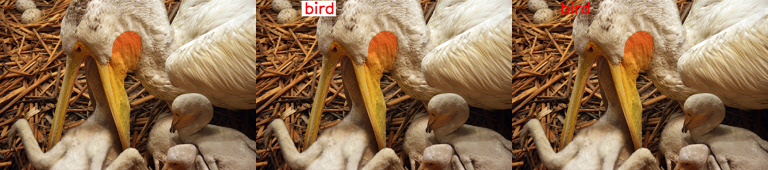

In [ ]:
img = imgd["img"]
bbox = imgd["bbox"][0]
label = imgd["cats"][0]
imgo = add_label(img, bbox, label)
imgo2 = add_label(img, bbox, label, draw_bg=False)
image_grid([thumbnail(i, size=256) for i in [img, imgo, imgo2]], rows=1, cols=3)

> Since there are too many arguments. Adding some automation to this will help. we will choose colors randomly to draw bbox 

In [ ]:
#| export 
def random_color():
    c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
    c = (np.asarray(c)*255).astype(int)
    return c.tolist()

In [ ]:
c = random_color()
c

[219, 125, 252]

In [ ]:
#| export 
def draw_bbox_with_label(img, bbox, label, overlay=True):
    img = img.copy()
    img = draw_bbox(img, bbox, bbox_color=random_color(), overlay=overlay)
    img = add_label(img, bbox, label, text_color=(0, 0, 0))
    return img

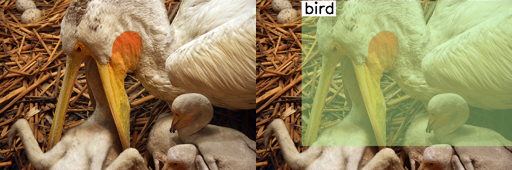

In [ ]:
img = imgd["img"]
bbox = imgd["bbox"][0]
label = imgd["cats"][0]
imgo = draw_bbox_with_label(img, bbox, label)
image_grid([thumbnail(i, size=256) for i in [img, imgo]], rows=1, cols=2)

In [ ]:
#| export 
def vis_annots(img, bboxes, labels, overlay=True):
    for bbox, label in zip(bboxes, labels): img = draw_bbox_with_label(img, bbox, label, overlay=overlay)
    return img

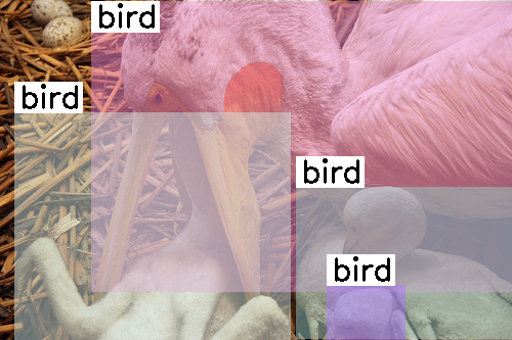

In [ ]:
img = imgd["img"]
bboxes = imgd["bbox"]
labels = imgd["cats"]
img = vis_annots(img, bboxes, labels)
thumbnail(img, size=512)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()